In [1]:
import os
import random
import shutil
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

In [2]:
balanced_folder = './balanced_dataset'  
output_base = './preprocessed'  

os.makedirs(output_base, exist_ok=True)

preprocessing_types = [
    'resized_100x100',
    'resized_150x150', 
    'normalized',
    'augmented_rotation',
    'augmented_flip',
    'augmented_zoom',
    'augmented_brightness',
    'contrast_clahe',
    'segmented'
]

for preprocess_type in preprocessing_types:
    preprocess_folder = os.path.join(output_base, preprocess_type)
    os.makedirs(preprocess_folder, exist_ok=True)
    
    for label in os.listdir(balanced_folder):
        label_path = os.path.join(balanced_folder, label)
        if os.path.isdir(label_path):
            os.makedirs(os.path.join(preprocess_folder, label), exist_ok=True)

In [3]:
all_images = []
for label in os.listdir(balanced_folder):
    label_path = os.path.join(balanced_folder, label)
    if os.path.isdir(label_path):
        for img_file in os.listdir(label_path):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
                all_images.append((label, img_file))


display_samples = {preprocess: [] for preprocess in preprocessing_types}

print(f"Found {len(all_images)} images to process")

Found 31810 images to process


## Image Preprocessing Implementation

The following cell applies all preprocessing techniques to each image.

In [4]:
for label, img_filename in all_images:
    img_path = os.path.join(balanced_folder, label, img_filename)
    
    # Load image with PIL for resizing
    pil_img = Image.open(img_path)
    
    # Resize to 100x100
    img_resized_100 = pil_img.resize((100, 100), Image.LANCZOS)
    resized_100_path = os.path.join(output_base, 'resized_100x100', label, img_filename)
    img_resized_100.save(resized_100_path)
    
    # Track samples for display
    if len(display_samples['resized_100x100']) < 5:
        display_samples['resized_100x100'].append((label, img_filename))
    elif random.random() < 0.2:  # 20% chance to replace
        replace_idx = random.randint(0, 4)
        display_samples['resized_100x100'][replace_idx] = (label, img_filename)

print("Completed resizing to 100x100")

Completed resizing to 100x100


In [5]:
for label, img_filename in all_images:
    img_path = os.path.join(balanced_folder, label, img_filename)
    
    # Load image with PIL for resizing
    pil_img = Image.open(img_path)
    
    # Resize to 150x150
    img_resized_150 = pil_img.resize((150, 150), Image.LANCZOS)
    resized_150_path = os.path.join(output_base, 'resized_150x150', label, img_filename)
    img_resized_150.save(resized_150_path)
    
    # Track samples for display
    if len(display_samples['resized_150x150']) < 5:
        display_samples['resized_150x150'].append((label, img_filename))
    elif random.random() < 0.2:  # 20% chance to replace
        replace_idx = random.randint(0, 4)
        display_samples['resized_150x150'][replace_idx] = (label, img_filename)

print("Completed resizing to 150x150")

Completed resizing to 150x150


In [6]:
for label, img_filename in all_images:
    img_path = os.path.join(balanced_folder, label, img_filename)
    
    # Load image with OpenCV
    cv_img = cv2.imread(img_path)
    if cv_img is None:
        print(f"Warning: Could not read {img_path} with OpenCV. Skipping.")
        continue
    
    # Convert to RGB for consistent processing
    cv_img_rgb = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)
    
    # Normalize (rescale pixel values from 0-255 to 0-1)
    # For saving, we scale back to 0-255 as image formats don't support 0-1 float values
    cv_img_norm = cv_img_rgb / 255.0
    cv_img_norm_save = (cv_img_norm * 255).astype(np.uint8)
    norm_path = os.path.join(output_base, 'normalized', label, img_filename)
    cv2.imwrite(norm_path, cv2.cvtColor(cv_img_norm_save, cv2.COLOR_RGB2BGR))
    
    # Track samples for display
    if len(display_samples['normalized']) < 5:
        display_samples['normalized'].append((label, img_filename))
    elif random.random() < 0.2:  # 20% chance to replace
        replace_idx = random.randint(0, 4)
        display_samples['normalized'][replace_idx] = (label, img_filename)

print("Completed normalization")

Completed normalization


In [7]:
for label, img_filename in all_images:
    img_path = os.path.join(balanced_folder, label, img_filename)
    
    
    cv_img = cv2.imread(img_path)
    if cv_img is None:
        print(f"Warning: Could not read {img_path} with OpenCV. Skipping.")
        continue
    
    cv_img_rgb = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)
    
    angle = random.uniform(-30, 30)
    height, width = cv_img_rgb.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)
    cv_img_rotated = cv2.warpAffine(cv_img_rgb, rotation_matrix, (width, height))
    rot_path = os.path.join(output_base, 'augmented_rotation', label, img_filename)
    cv2.imwrite(rot_path, cv2.cvtColor(cv_img_rotated, cv2.COLOR_RGB2BGR))
    
    
    if len(display_samples['augmented_rotation']) < 5:
        display_samples['augmented_rotation'].append((label, img_filename))
    elif random.random() < 0.2:  
        replace_idx = random.randint(0, 4)
        display_samples['augmented_rotation'][replace_idx] = (label, img_filename)

print("Completed rotation augmentation")

Completed rotation augmentation


In [8]:
for label, img_filename in all_images:
    img_path = os.path.join(balanced_folder, label, img_filename)
    
    # Load image with OpenCV
    cv_img = cv2.imread(img_path)
    if cv_img is None:
        print(f"Warning: Could not read {img_path} with OpenCV. Skipping.")
        continue
    
    # Convert to RGB
    cv_img_rgb = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)
    
    # Flip horizontally
    cv_img_flipped = cv2.flip(cv_img_rgb, 1)  # 1 means horizontal flip
    flip_path = os.path.join(output_base, 'augmented_flip', label, img_filename)
    cv2.imwrite(flip_path, cv2.cvtColor(cv_img_flipped, cv2.COLOR_RGB2BGR))
    
    # Track samples for display
    if len(display_samples['augmented_flip']) < 5:
        display_samples['augmented_flip'].append((label, img_filename))
    elif random.random() < 0.2:  # 20% chance to replace
        replace_idx = random.randint(0, 4)
        display_samples['augmented_flip'][replace_idx] = (label, img_filename)

print("Completed flip augmentation")

Completed flip augmentation


In [9]:
for label, img_filename in all_images:
    img_path = os.path.join(balanced_folder, label, img_filename)
    
    # Load image with OpenCV
    cv_img = cv2.imread(img_path)
    if cv_img is None:
        print(f"Warning: Could not read {img_path} with OpenCV. Skipping.")
        continue
    
    # Convert to RGB
    cv_img_rgb = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)
    
    # Apply random zoom
    zoom_factor = random.uniform(0.8, 1.2)
    h, w = cv_img_rgb.shape[:2]
    zoom_matrix = cv2.getRotationMatrix2D((w/2, h/2), 0, zoom_factor)
    cv_img_zoomed = cv2.warpAffine(cv_img_rgb, zoom_matrix, (w, h))
    zoom_path = os.path.join(output_base, 'augmented_zoom', label, img_filename)
    cv2.imwrite(zoom_path, cv2.cvtColor(cv_img_zoomed, cv2.COLOR_RGB2BGR))
    
    # Track samples for display
    if len(display_samples['augmented_zoom']) < 5:
        display_samples['augmented_zoom'].append((label, img_filename))
    elif random.random() < 0.2:  # 20% chance to replace
        replace_idx = random.randint(0, 4)
        display_samples['augmented_zoom'][replace_idx] = (label, img_filename)

print("Completed zoom augmentation")

Completed zoom augmentation


In [10]:
for label, img_filename in all_images:
    img_path = os.path.join(balanced_folder, label, img_filename)
    
    # Load image with PIL for brightness adjustment
    pil_img = Image.open(img_path)
    
    # Adjust brightness
    brightness_factor = random.uniform(0.7, 1.3)
    enhancer = ImageEnhance.Brightness(pil_img)
    pil_img_bright = enhancer.enhance(brightness_factor)
    bright_path = os.path.join(output_base, 'augmented_brightness', label, img_filename)
    pil_img_bright.save(bright_path)
    
    # Track samples for display
    if len(display_samples['augmented_brightness']) < 5:
        display_samples['augmented_brightness'].append((label, img_filename))
    elif random.random() < 0.2:  # 20% chance to replace
        replace_idx = random.randint(0, 4)
        display_samples['augmented_brightness'][replace_idx] = (label, img_filename)

print("Completed brightness augmentation")

Completed brightness augmentation


In [11]:
for label, img_filename in all_images:
    img_path = os.path.join(balanced_folder, label, img_filename)
    
    # Load image with OpenCV
    cv_img = cv2.imread(img_path)
    if cv_img is None:
        print(f"Warning: Could not read {img_path} with OpenCV. Skipping.")
        continue
    
    # Convert to grayscale
    img_gray = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)
    
    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img_clahe = clahe.apply(img_gray)
    
    # Convert back to BGR for saving
    img_clahe_bgr = cv2.cvtColor(img_clahe, cv2.COLOR_GRAY2BGR)
    clahe_path = os.path.join(output_base, 'contrast_clahe', label, img_filename)
    cv2.imwrite(clahe_path, img_clahe_bgr)
    
    # Track samples for display
    if len(display_samples['contrast_clahe']) < 5:
        display_samples['contrast_clahe'].append((label, img_filename))
    elif random.random() < 0.2:  # 20% chance to replace
        replace_idx = random.randint(0, 4)
        display_samples['contrast_clahe'][replace_idx] = (label, img_filename)

print("Completed CLAHE contrast enhancement")

Completed CLAHE contrast enhancement


In [12]:
for label, img_filename in all_images:
    img_path = os.path.join(balanced_folder, label, img_filename)
    
    # Load image with OpenCV
    cv_img = cv2.imread(img_path)
    if cv_img is None:
        print(f"Warning: Could not read {img_path} with OpenCV. Skipping.")
        continue
    
    # Convert to grayscale
    gray = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)
    
    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Apply Otsu's thresholding
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Find largest contour (assumed to be the cat)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        
        # Create a mask for the largest contour
        mask = np.zeros_like(gray)
        cv2.drawContours(mask, [largest_contour], 0, 255, -1)
        
        # Apply the mask to the original image
        segmented = cv2.bitwise_and(cv_img, cv_img, mask=mask)
        seg_path = os.path.join(output_base, 'segmented', label, img_filename)
        cv2.imwrite(seg_path, segmented)
        
        # Track samples for display
        if len(display_samples['segmented']) < 5:
            display_samples['segmented'].append((label, img_filename))
        elif random.random() < 0.2:  # 20% chance to replace
            replace_idx = random.randint(0, 4)
            display_samples['segmented'][replace_idx] = (label, img_filename)

print("Completed segmentation")

Completed segmentation


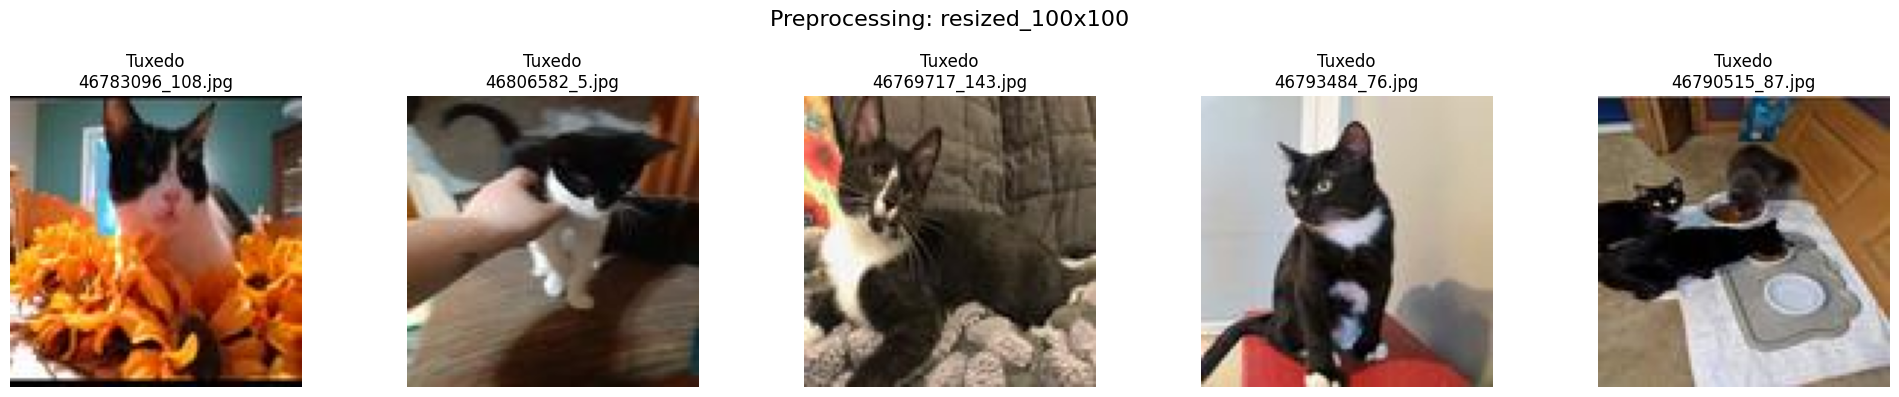

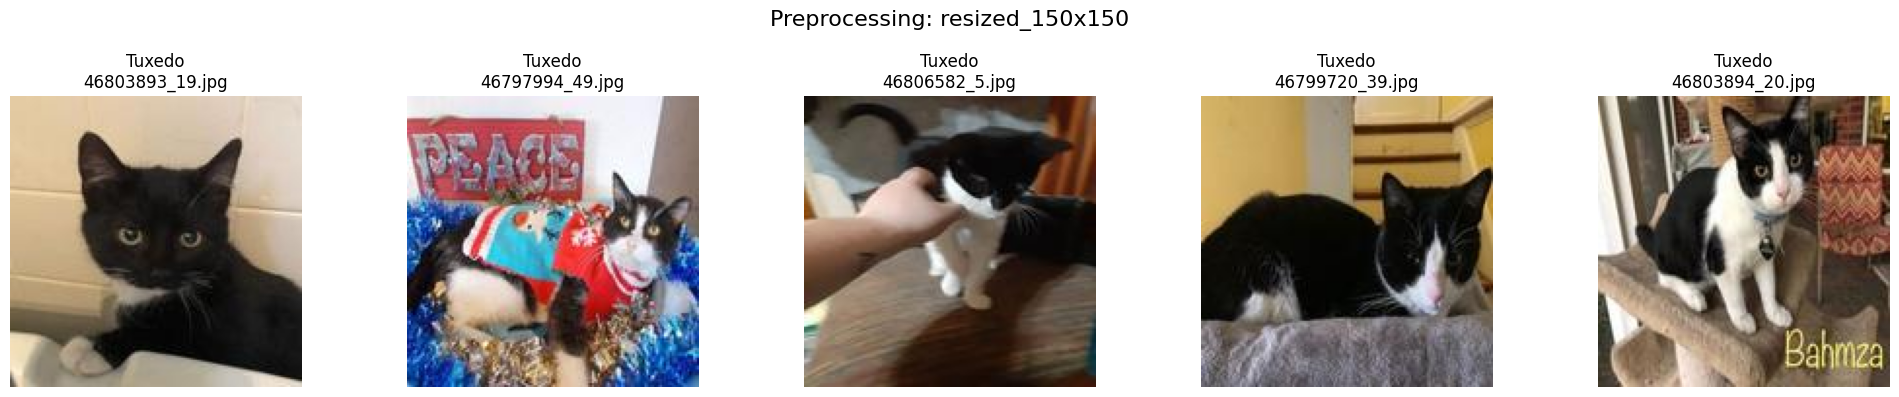

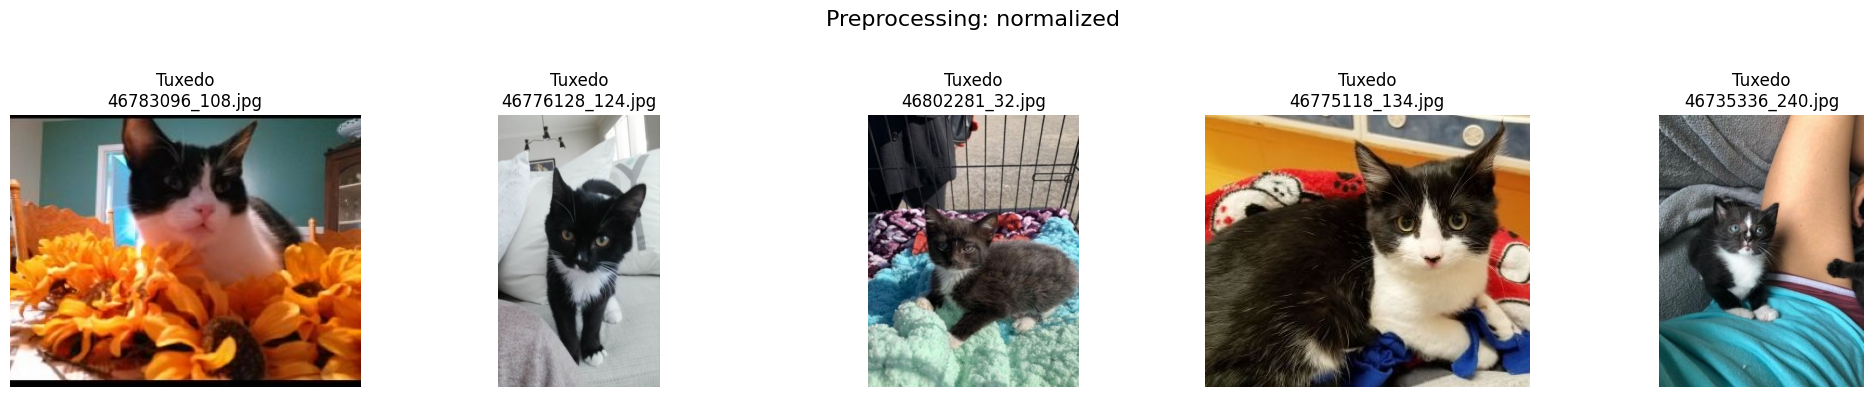

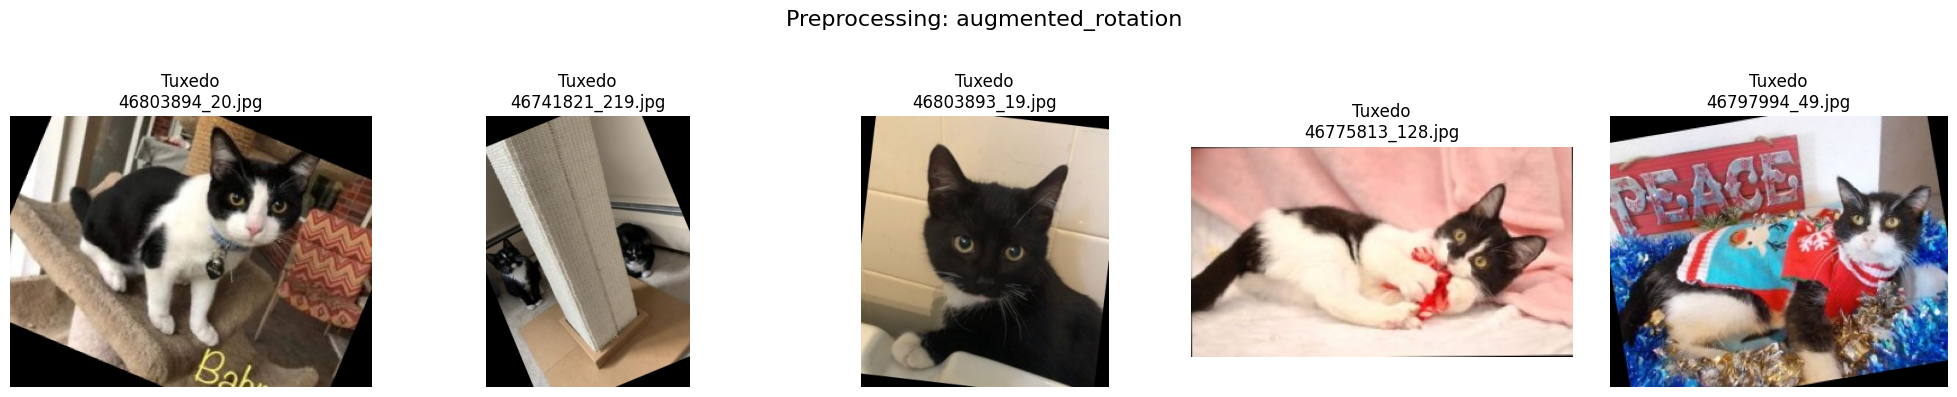

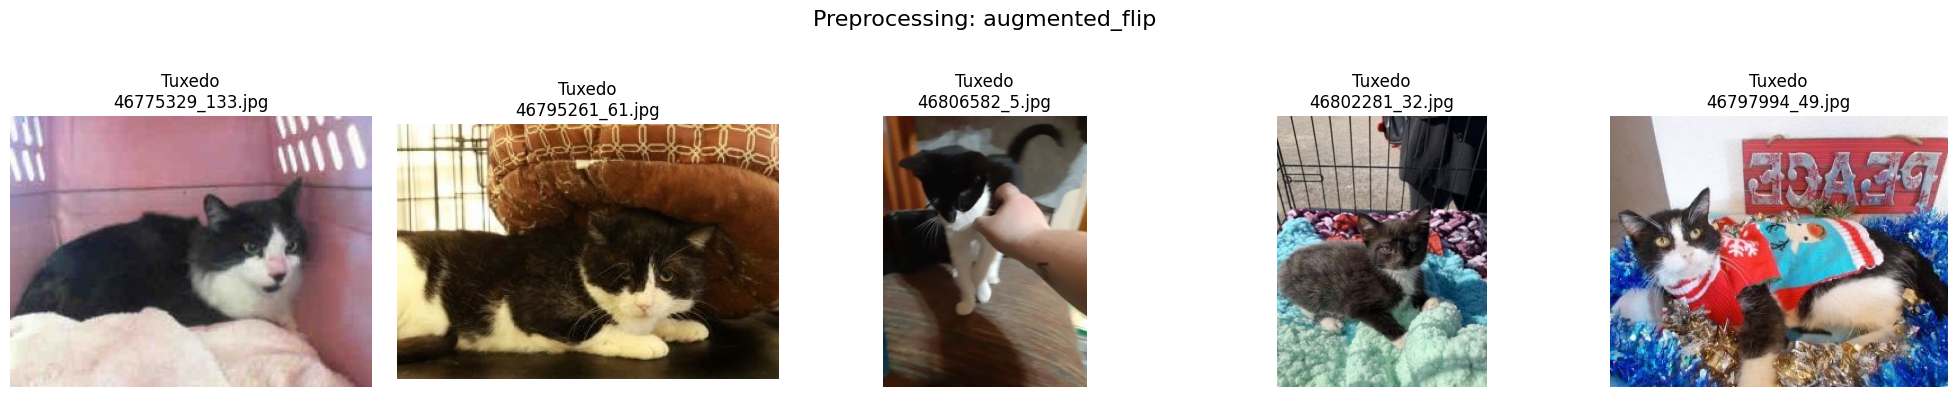

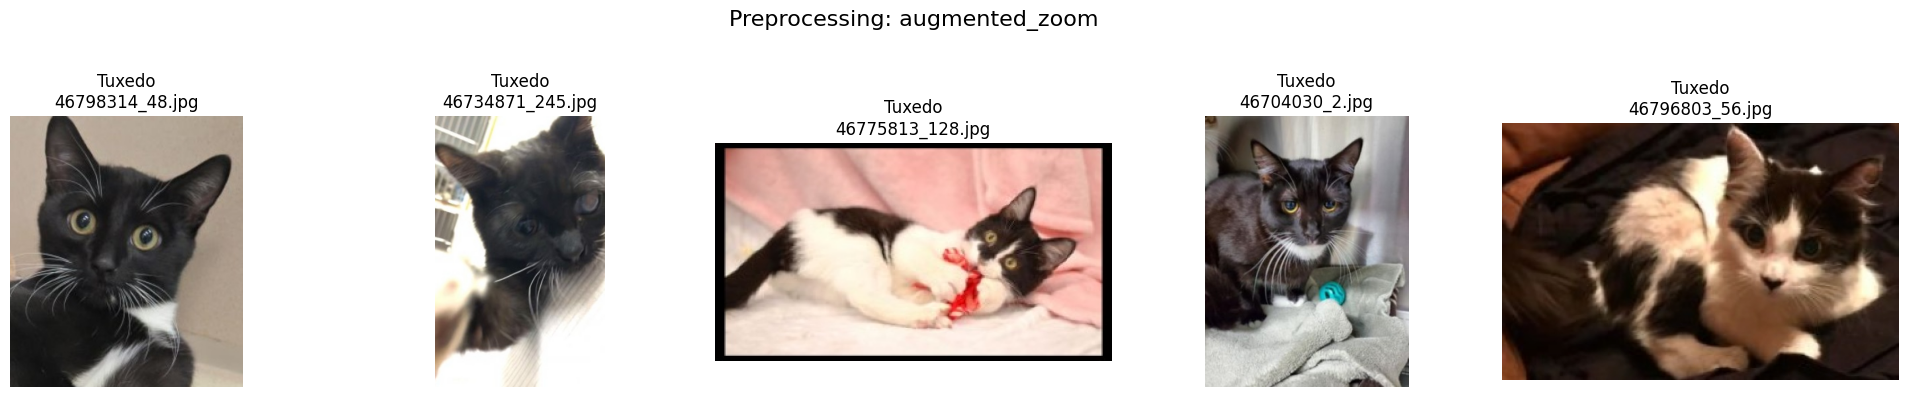

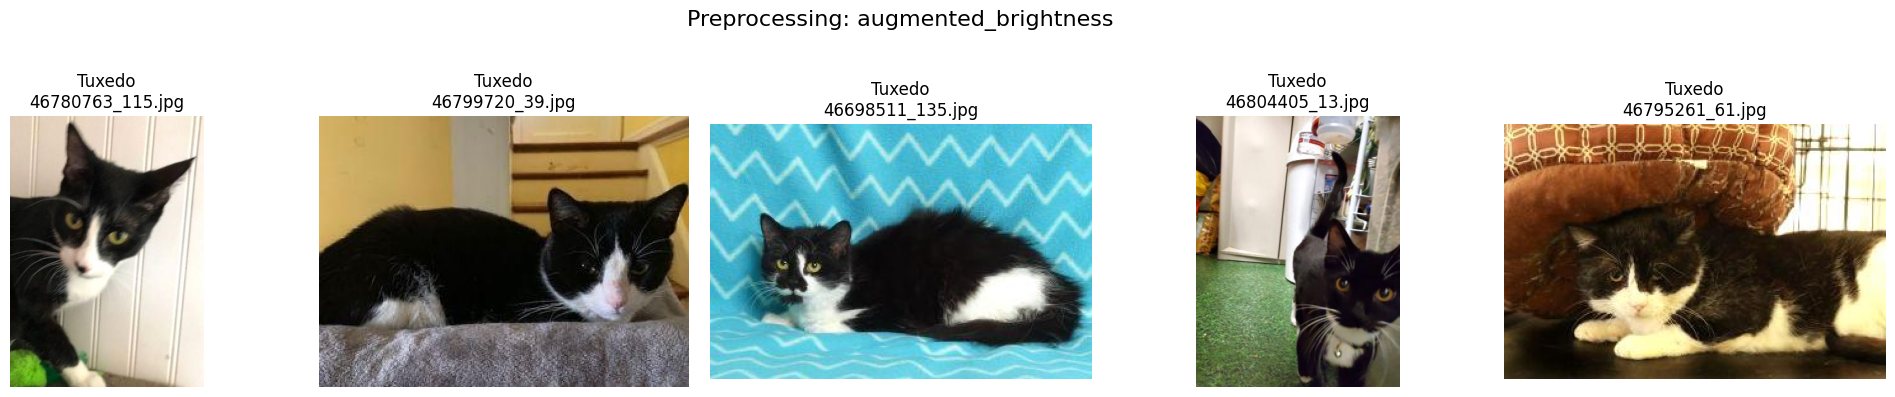

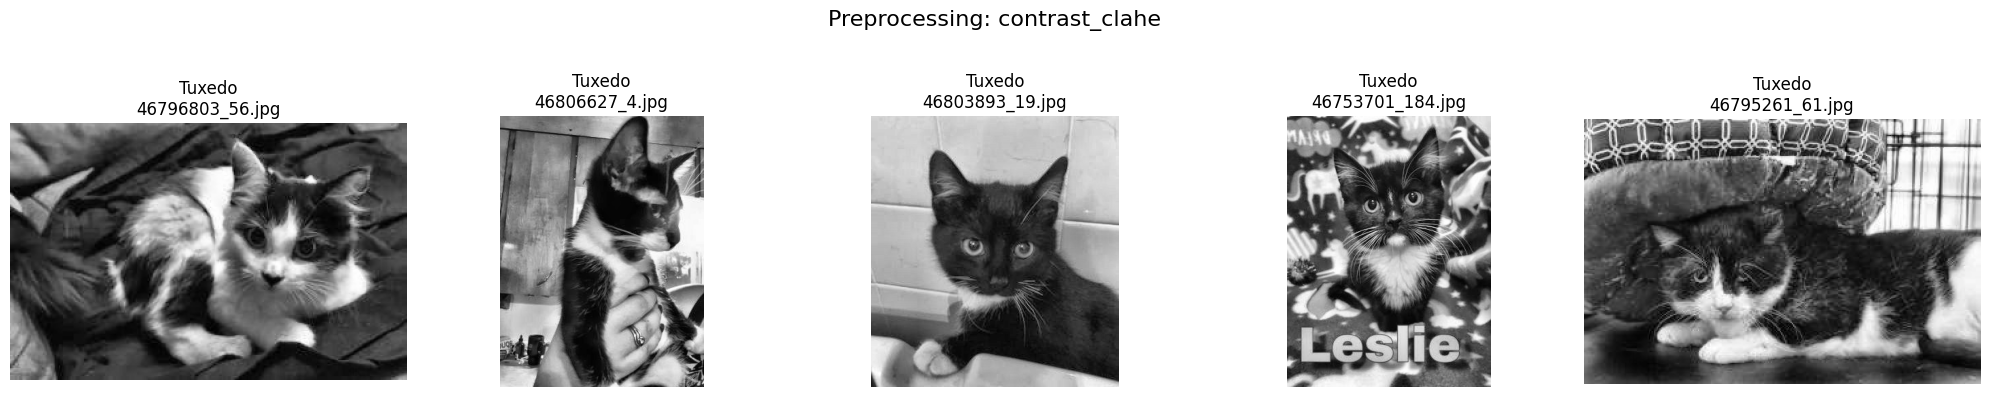

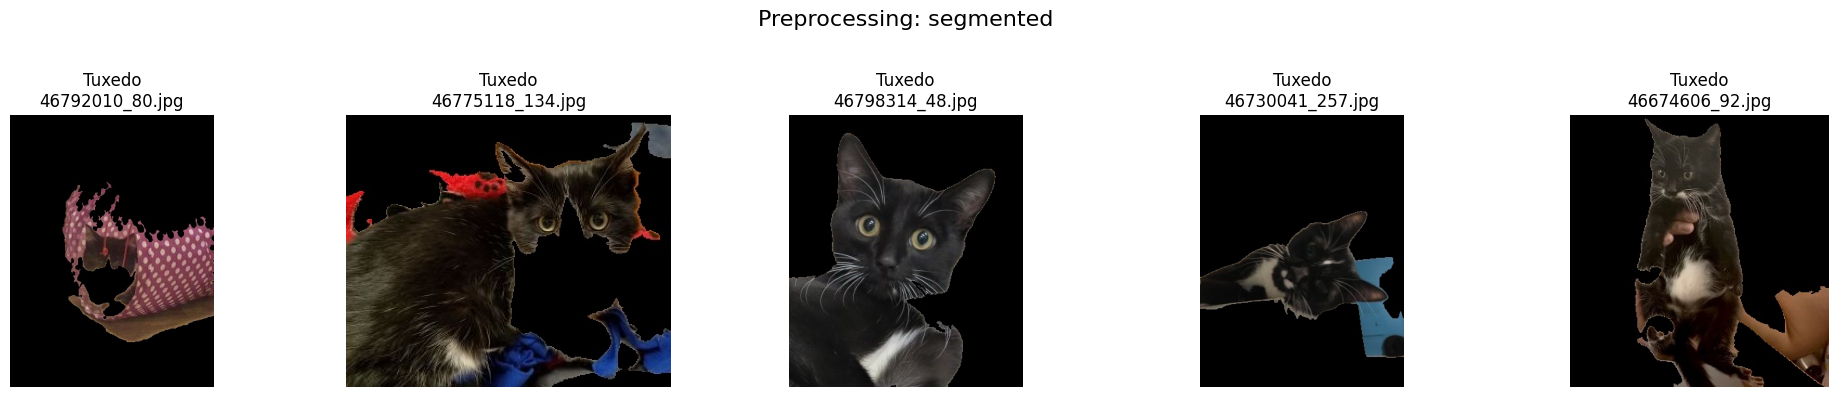

In [13]:
def display_preprocessing_results(preprocess_type):
    plt.figure(figsize=(20, 4))
    plt.suptitle(f'Preprocessing: {preprocess_type}', fontsize=16)
    
    for i, (label, img_filename) in enumerate(display_samples[preprocess_type], 1):
        img_path = os.path.join(output_base, preprocess_type, label, img_filename)
        
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            plt.subplot(1, 5, i)
            plt.imshow(img)
            plt.title(f'{label}\n{img_filename}')
            plt.axis('off')
        else:
            print(f"Warning: Image {img_path} not found")
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Display results for each preprocessing technique
for preprocess_type in preprocessing_types:
    display_preprocessing_results(preprocess_type)

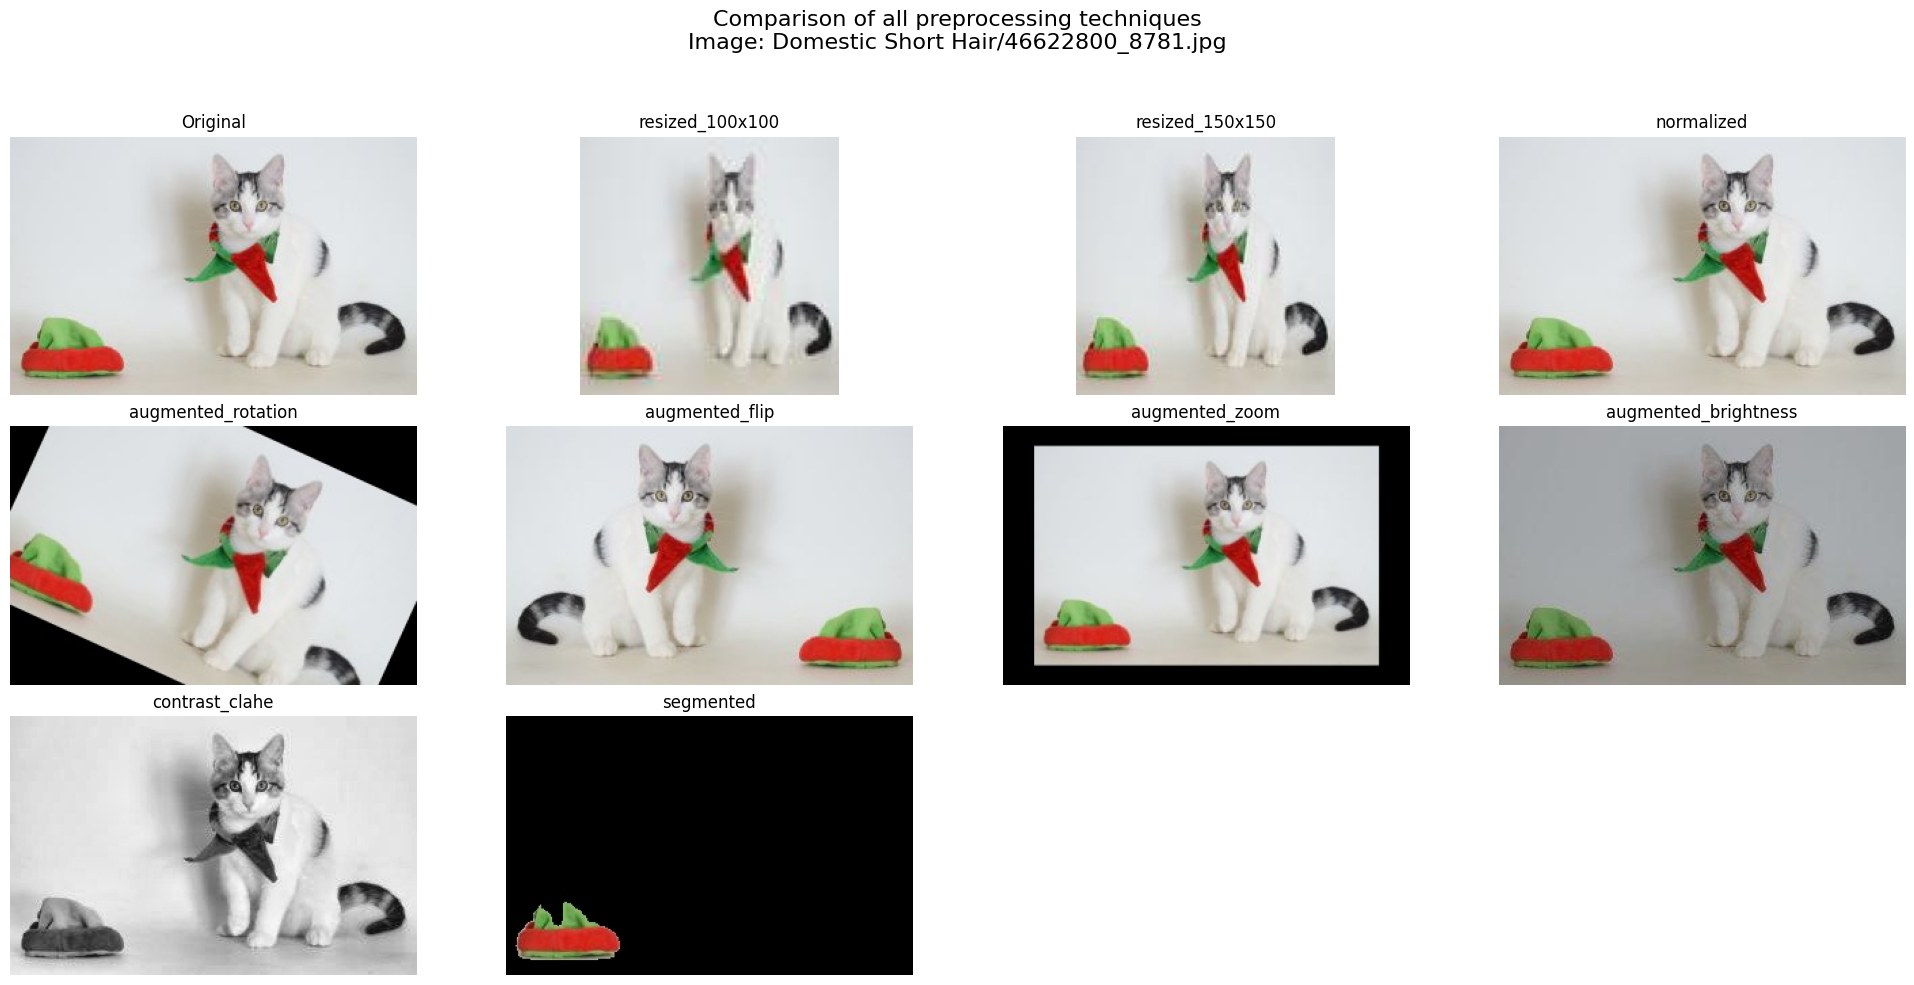

In [14]:
if all_images:
    # Select a random image
    random_label, random_img = random.choice(all_images)
    
    plt.figure(figsize=(20, 10))
    plt.suptitle(f'Comparison of all preprocessing techniques\nImage: {random_label}/{random_img}', fontsize=16)
    
    # Original image
    original_path = os.path.join(balanced_folder, random_label, random_img)
    original_img = cv2.imread(original_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(3, 4, 1)
    plt.imshow(original_img)
    plt.title('Original')
    plt.axis('off')
    
    # Get each preprocessing type for the same image
    for i, preprocess in enumerate(preprocessing_types, 2):
        preprocess_path = os.path.join(output_base, preprocess, random_label, random_img)
        if os.path.exists(preprocess_path):
            preprocess_img = cv2.imread(preprocess_path)
            preprocess_img = cv2.cvtColor(preprocess_img, cv2.COLOR_BGR2RGB)
            
            plt.subplot(3, 4, i)
            plt.imshow(preprocess_img)
            plt.title(preprocess)
            plt.axis('off')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
else:
    print("No images found to compare")